In [1]:
WORKSPACEFOLDER = 'E:\Projects\ComplexNetwork'
import os
os.chdir(WORKSPACEFOLDER)

In [2]:
import json

import torch

import config

In [3]:
DB = config.get_DB()

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib notebook

In [6]:
with open(os.path.join(DB, 'SNAPTwitter/nodes_degree_approx_20.json'), 'r') as f:
    nodes = json.load(f)
with open(os.path.join(DB, 'SNAPTwitter/SNAPTwitter.node2vec.emb.json'), 'r') as f:
    node_emb = json.load(f)
with open(os.path.join(DB, 'SNAPTwitter/p_gin_beta0.0120.json'), 'r') as f:
    p_gins = json.load(f)

In [7]:
import src.main.util.nn.sample as sample
import src.main.util.nn.training as training
import src.main.model.nn.custom_module as custom_module

# SNAPTwitter

-   cn20
-   beta=0.0120

```
Conf:
model: <class 'src.main.model.nn.custom_module.OrderIndependentNet'>
activation: <class 'torch.nn.modules.activation.RReLU'>
optimizer: <class 'torch.optim.adam.Adam'>
loss_fn: NLLLoss()
lr: 0.01
weight_decay: 0.0
n_epochs: 1000
early_stop_epoch: 50

OrderIndependentNet(
  (sequential): ThereLayersSequential(
    (linear1): Linear(in_features=128, out_features=86, bias=True)
    (activation1): RReLU(lower=0.125, upper=0.3333333333333333)
    (linear2): Linear(in_features=86, out_features=44, bias=True)
    (activation2): RReLU(lower=0.125, upper=0.3333333333333333)
    (linear3): Linear(in_features=44, out_features=1, bias=True)
    (activation3): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (log_softmax): LogSoftmax()
)

num_samples = 2e4
```

In [ ]:
def best_model(samples, conf):
    best_model, best_validation_hit_rate = None, 0.0
    for i in range(10):
        model, validation_hit_rate = training.classify(samples, 2, conf)
        if validation_hit_rate > best_validation_hit_rate:
            best_model = model
            best_validation_hit_rate = validation_hit_rate
    return best_model, best_validation_hit_rate

In [ ]:
models = []
hit_rates = []
conf = training.Conf()
for i in range(10):
    samples = sample.get_samples_order_independent_net(nodes, node_emb, p_gins, num_samples)
    m, h = best_model(samples, conf)
    models.append(m)
    hit_rates.append(h)
print(sum(hit_rates) / len(hit_rates))

In [ ]:
for i, m in enumerate(models):
    torch.save(m.state_dict(), f'db/SNAPTwitter/nn/order_independent_net/cn20_beta0.0120_{i}.pt')    

<IPython.core.display.Javascript object>


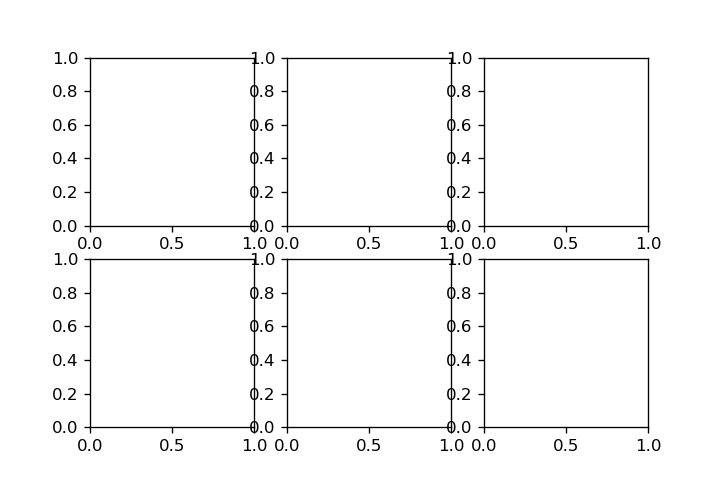

In [87]:
fig, ax = plt.subplots(2, 3, figsize=(6, 4))

In [ ]:
conf = training.Conf()
conf.model = custom_module.OrderIndependentNet
conf.loss_fn = torch.nn.NLLLoss()
conf.early_stop_epoch = 30
for i in range(1):
    for j in range(3):
        samples = sample.get_samples_order_independent_net(nodes, node_emb, p_gins, 40000)
        model = training.classify(samples, 2, conf, ax[i][j])

training hit rate -->  0.94003125,          validation hit rate -->  0.91337500
training hit rate -->  0.94637500,          validation hit rate -->  0.92237500


In [14]:
samples_test = sample.get_samples_order_independent_net(nodes, node_emb, p_gins)

In [86]:
test_guess = model(samples_test[:, :-1])

training.hit_rate(test_guess, samples_test[:, -1])

0.9104